In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df1 = pd.read_csv('States/second_state')

In [3]:
df1.head()

,Unnamed: 0,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [4]:
df1.drop('Unnamed: 0', axis='columns', inplace=True)

In [5]:
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [27]:
def comparing_rooms_sqft_price(df, location):
    bh3 = df[(df.location==location) & (df.bhk==3)]
    bh2 = df[(df.location==location) & (df.bhk==2)]
    plt.scatter(bh3.total_sqft, bh3.price, color='red', marker='*', label='with 3 room', s=50)
    plt.scatter(bh2.total_sqft, bh2.price, color='blue', marker='+', label='with 2 room', s=50)
    plt.title(f'The location is : {location}')
    plt.xlabel('Total squer feat area')
    plt.ylabel('Price (Lakh Indian Rupees)')
    plt.legend()
    plt.show()

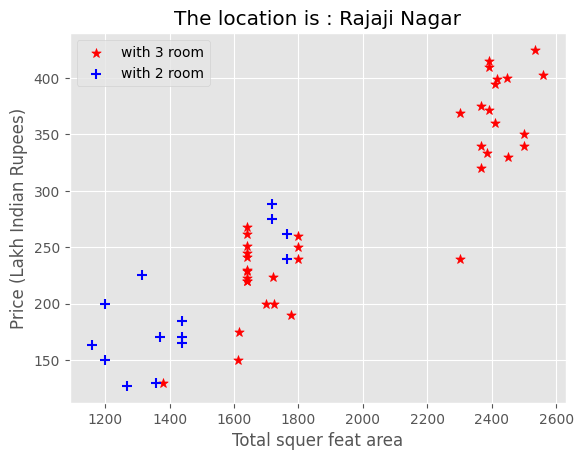

In [28]:
comparing_rooms_sqft_price(df1, "Rajaji Nagar")

In [6]:
bhk_sort_list = []
for location, location_df in df1.groupby('location'):
    bhk_means = {}
    lst = []
    for bhk, bhk_df in location_df.groupby('bhk'):
        if bhk_df.shape[0]>5:
            lst.append([bhk, np.mean(bhk_df.price_per_sqft)])
    bhk_means = {location:lst}
    if bhk_means[location]:
        bhk_sort_list.append(bhk_means)

In [7]:
bhk_sort_list[:10]

[{'1st Phase JP Nagar': [[2, 7931.806799837383], [3, 9151.192151725822]]},
 {'5th Phase JP Nagar': [[2, 5067.359785883266], [3, 5112.892626961968]]},
 {'6th Phase JP Nagar': [[2, 5932.976565810137]]},
 {'7th Phase JP Nagar': [[2, 6272.516842644273], [3, 6612.861682598103]]},
 {'8th Phase JP Nagar': [[2, 4324.406715739656], [3, 4293.744876160689]]},
 {'9th Phase JP Nagar': [[2, 4653.05138390364], [3, 4518.339436369508]]},
 {'AECS Layout': [[2, 4921.300339526721]]},
 {'Abbigere': [[2, 4058.165803016323]]},
 {'Akshaya Nagar': [[2, 4781.22783734999], [3, 5294.361032273932]]},
 {'Ambalipura': [[2, 5886.737386783397], [3, 6331.134555298749]]}]

In [8]:
df1[df1.location=='1st Phase JP Nagar'].index.values

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26], dtype=int64)

In [23]:
# remove_objects_list = []
index_list = np.array([])
index = 0
for location, location_df in df1.groupby('location'):
    for bhk, bhk_df in location_df.groupby('bhk'):
        for j, t in enumerate(bhk_sort_list):
            if list(t.keys())[0]!=location:
                continue
            for i in range(0, 16, 1):
                try:
                    if bhk_sort_list[j][location][i][0]+1==bhk:
                        # for x, y in enumerate(bhk_df.price_per_sqft):
                        index_list = np.append(index_list, bhk_df[bhk_df.price_per_sqft<bhk_sort_list[j][location][i][1]].index.values)
                                # remove_objects_list.append([y, location, bhk])
                                # index_list.append(index)
                except:
                    pass

In [24]:
len(list(index_list))

2912

In [26]:
list(index_list)[-10:]

[9309.0,
 9319.0,
 9441.0,
 9760.0,
 9896.0,
 8964.0,
 9078.0,
 8624.0,
 9674.0,
 10213.0]

In [30]:
df2 = df1.drop(index_list, axis='index')

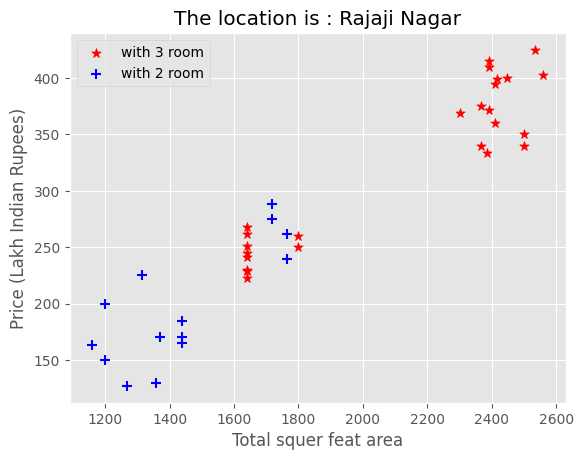

In [31]:
comparing_rooms_sqft_price(df2, "Rajaji Nagar")

In [33]:
df2.shape

(7329, 8)

In [34]:
df2.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000
mean,1493.258283,2.451903,1.533906,98.795452,2.500341,6124.960960
std,860.210268,1.014718,0.784663,93.028576,0.928551,2408.673991
min,300.000000,1.000000,0.000000,10.000000,1.000000,1300.000000
25%,1096.000000,2.000000,1.000000,50.000000,2.000000,4598.384728
50%,1259.000000,2.000000,1.000000,73.000000,2.000000,5680.000000
75%,1677.000000,3.000000,2.000000,112.000000,3.000000,6896.551724
max,30000.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


In [32]:
df2.to_csv('States/third_state')